# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

In [ ]:
cities.index



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?q="

temps = []
wind_speeds = []
humidity_per = []
cloudiness = []
lats = []
lons = []
cities2 = []
for city in cities:
    try:
        response = requests.get(base_url + city + "&appid=" + api_key + "&units=imperial")
        
        data = response.json()
        
    
        temp = data['main']['temp']
        clouds = data['clouds']['all']
        humidity = data['main']['humidity']
        wind_speed = data['wind']['speed']
        lat = data['coord']['lat']
        lon = data['coord']['lon']
        temps.append(temp)
        cloudiness.append(clouds)
        humidity_per.append(humidity)
        wind_speeds.append(wind_speed)
        lats.append(lat)
        lons.append(lon)
        cities2.append(city)
        print(f"Adding data for {city}. City number {len(lons)}.")

    except KeyError: 
        print("City not found.")
    

Adding data for mount isa. City number 1.
Adding data for mpigi. City number 2.
Adding data for severo-kurilsk. City number 3.
City not found.
Adding data for bredasdorp. City number 4.
Adding data for tasiilaq. City number 5.
Adding data for petropavlovsk-kamchatskiy. City number 6.
Adding data for komsomolskiy. City number 7.
Adding data for hermanus. City number 8.
Adding data for hobart. City number 9.
Adding data for kodiak. City number 10.
Adding data for ushuaia. City number 11.
Adding data for necochea. City number 12.
Adding data for khandbari. City number 13.
Adding data for hilo. City number 14.
Adding data for talnakh. City number 15.
Adding data for upernavik. City number 16.
Adding data for rikitea. City number 17.
Adding data for taltal. City number 18.
Adding data for atuona. City number 19.
Adding data for port-cartier. City number 20.
City not found.
Adding data for albany. City number 21.
Adding data for saint-joseph. City number 22.
Adding data for belyy yar. City n

Adding data for iqaluit. City number 185.
City not found.
Adding data for vorontsovka. City number 186.
Adding data for victoria. City number 187.
City not found.
Adding data for rawson. City number 188.
Adding data for ojinaga. City number 189.
Adding data for lagos. City number 190.
Adding data for acapulco. City number 191.
Adding data for longyearbyen. City number 192.
Adding data for san cristobal. City number 193.
Adding data for gerash. City number 194.
Adding data for lerwick. City number 195.
Adding data for norton. City number 196.
Adding data for filingue. City number 197.
City not found.
Adding data for imeni poliny osipenko. City number 198.
Adding data for padang. City number 199.
Adding data for kijini. City number 200.
City not found.
Adding data for nabire. City number 201.
Adding data for lahad datu. City number 202.
Adding data for guerrero negro. City number 203.
Adding data for mpika. City number 204.
Adding data for ouadda. City number 205.
Adding data for belaya 

Adding data for tahe. City number 365.
Adding data for moindou. City number 366.
Adding data for mingshui. City number 367.
Adding data for hrebinka. City number 368.
Adding data for eyrarbakki. City number 369.
Adding data for wajima. City number 370.
Adding data for santa rosa. City number 371.
Adding data for isangel. City number 372.
Adding data for manika. City number 373.
City not found.
Adding data for micheweni. City number 374.
Adding data for acajutla. City number 375.
Adding data for molina. City number 376.
Adding data for utete. City number 377.
Adding data for grand-santi. City number 378.
City not found.
Adding data for pitkyaranta. City number 379.
Adding data for kendari. City number 380.
City not found.
Adding data for ikom. City number 381.
Adding data for namibe. City number 382.
Adding data for hualmay. City number 383.
Adding data for tabou. City number 384.
Adding data for mariahu. City number 385.
Adding data for corrente. City number 386.
Adding data for jishou

Adding data for evensk. City number 550.
Adding data for berlevag. City number 551.
Adding data for westport. City number 552.
Adding data for paita. City number 553.
Adding data for ust-nera. City number 554.
Adding data for aykhal. City number 555.
Adding data for la asuncion. City number 556.
Adding data for sao joao da barra. City number 557.
Adding data for qasigiannguit. City number 558.
Adding data for saryozek. City number 559.
City not found.
Adding data for innisfail. City number 560.
Adding data for hambantota. City number 561.
Adding data for brora. City number 562.
Adding data for pocone. City number 563.
Adding data for douentza. City number 564.
Adding data for moron. City number 565.
Adding data for kununurra. City number 566.
Adding data for wolgast. City number 567.
Adding data for gasa. City number 568.
Adding data for gorontalo. City number 569.
Adding data for sambava. City number 570.
City not found.
Adding data for awjilah. City number 571.
Adding data for la fer

In [4]:
len(cities2)

580

In [5]:
city_data = pd.DataFrame({'City': cities2,
                          'Latitude': lats,
                          'Longitude': lons,
                          'Temperature': temps,
                          'Cloud Cover': cloudiness,
                          'Humidity': humidity_per,
                          'Wind Speed': wind_speeds})
city_data.head()

#Do some formatting here for %s and temperatures
#change index into city names


,City,Latitude,Longitude,Temperature,Cloud Cover,Humidity,Wind Speed
0,mount isa,-20.73,139.49,100.40,0,19,6.93
1,mpigi,0.23,32.32,68.00,75,94,7.99
2,severo-kurilsk,50.68,156.12,34.26,88,100,14.03
3,bredasdorp,-34.53,20.04,64.40,0,77,6.93
4,tasiilaq,65.61,-37.64,23.00,80,79,20.80


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
city_data.to_csv("city_data.csv",
                  encoding="utf-8", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

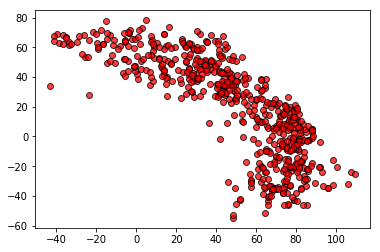

In [19]:
plt.scatter(temps, lats, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

#### Latitude vs. Humidity Plot

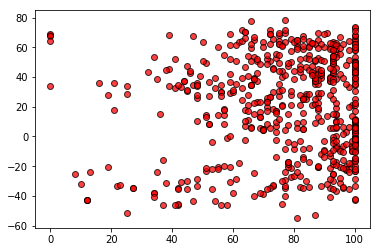

In [20]:
plt.scatter(humidity_per, lats, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

#### Latitude vs. Cloudiness Plot

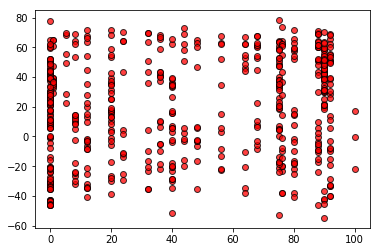

In [21]:
plt.scatter(cloudiness, lats, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

#### Latitude vs. Wind Speed Plot

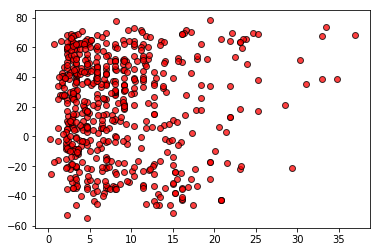

In [22]:
plt.scatter(wind_speeds, lats, marker="o", facecolors="red", edgecolors="black", alpha=0.75)